In [3]:
import rasterio
from rasterio.plot import show
import numpy as np  
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

<Axes: >

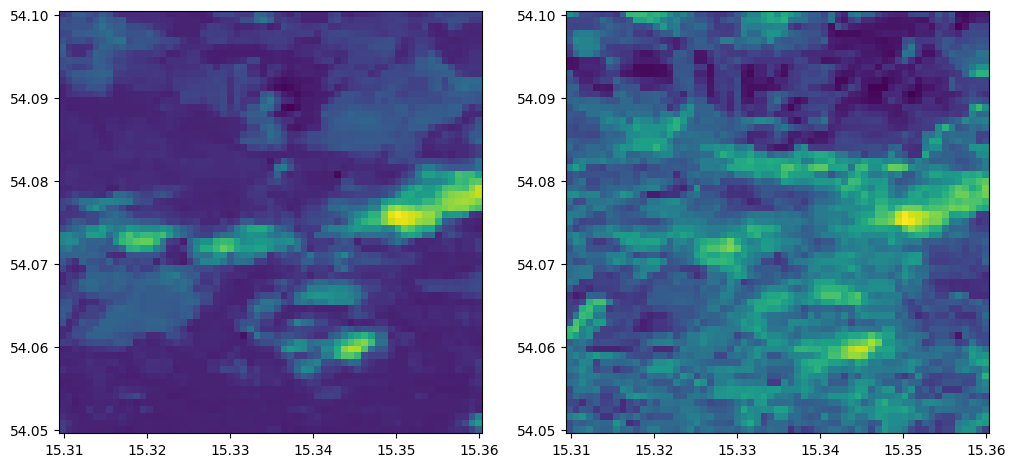

In [4]:
band_red = rasterio.open('mapa_new_red.SR_B4.tif')
band_nir  = rasterio.open('mapa_new_red.SR_B5.tif')

band_nir.crs 
#show(band_red)

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
show(band_red,ax=ax1)
show(band_nir,ax=ax2)

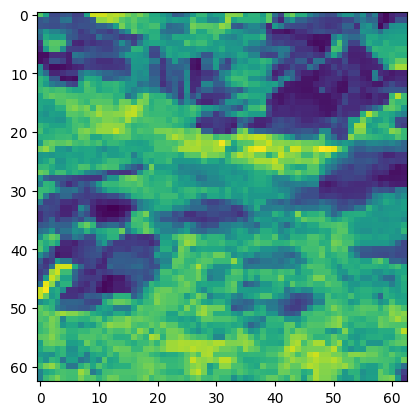

<Axes: >

In [5]:
red = band_red.read(1).astype('float64')
nir = band_nir.read(1).astype('float64')


ndvi = np.zeros(red.shape, dtype=rasterio.float64)
ndvi = (nir-red)/(nir+red)

show(ndvi) 

In [6]:
# Write to TIFF
kwargs = band_red.meta
kwargs.update(
    dtype=rasterio.float32,
    count=1,
    compress='lzw')


with rasterio.open('ndvi.tif', 'w',**kwargs) as dst:
        dst.write_band(1, ndvi.astype(rasterio.float64))

float32
[2 3 4 5]
[2, 3, 4, 5]


<Figure size 640x480 with 0 Axes>

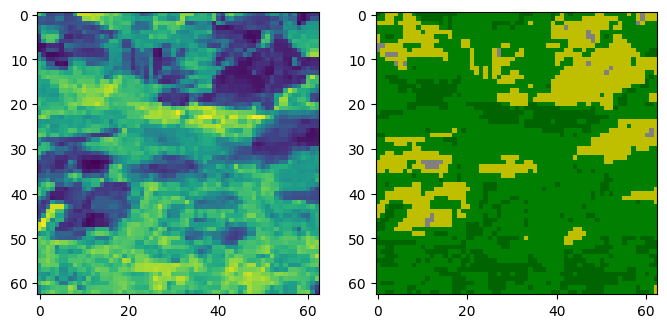

In [7]:
band_ndvi = rasterio.open('ndvi.tif')
ndvi_array= band_ndvi.read(1).astype('float64')

print(band_ndvi.dtypes[0])

#classification
ndvi_class_bins = np.array([ 0,0.05,0.1,0.2,0.4,0.6,0.8,1.0])
ndvi_landsat_class = np.digitize(ndvi_array, ndvi_class_bins)

ndvi_landsat_class = np.ma.masked_where(
     np.ma.getmask(ndvi), ndvi_landsat_class)


print(np.unique(ndvi_landsat_class))


# Define color map
nbr_colors = ["gray", "y", "yellowgreen", "g", "darkgreen"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "No Vegetation",
    "Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
]


classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:5]
print(classes)
"""
# Plot your data
fig, ax = plt.subplots(figsize=(6, 6))


#show.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()
fig.colorbar(im,ax=ax)
"""
#im = show(ndvi_landsat_class, 
plt.figure(1)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8, 4))
show((ndvi),ax=ax1)
show((ndvi_landsat_class),ax=ax2,cmap=nbr_cmap)

#fig.legend(ndvi,classes, title='Klasy')
#fig.colorbar(cax)

# # Auto adjust subplot to fit figure size
#plt.tight_layout()
#plt.legend()
plt.show()


In [13]:
#ndvi_landsat_class = np.where(3 ==10)

print(ndvi_landsat_class)
a = ndvi_landsat_class
b = np.where(a!=3,a ,10)
b

[[5 4 3 ... 3 3 3]
 [4 4 3 ... 3 3 3]
 [3 3 3 ... 4 4 4]
 ...
 [4 5 5 ... 4 4 4]
 [4 4 4 ... 4 4 3]
 [4 4 5 ... 5 4 3]]


dtype('int64')